# Importing Required Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC

from sklearn.metrics import classification_report
from sklearn import metrics
import seaborn as sn

#Importing (Reading) Datasets

In [2]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
data = pd.read_csv('/content/diabets.csv', header= None, names=col_names)
print(data.shape)
data.head()

(768, 9)


,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Checking for any null values in dataset

In [3]:
data.isnull().sum()

pregnant    0
glucose     0
bp          0
skin        0
insulin     0
bmi         0
pedigree    0
age         0
label       0
dtype: int64

#Assigning dependent and independent variables

In [4]:
feature_cols = ['pregnant','insulin', 'bmi', 'age','glucose','bp', 'pedigree']
x=data[feature_cols]
y=data.label
print('x:',x)
print('y:',y)

x:      pregnant  insulin   bmi  age  glucose  bp  pedigree
0           6        0  33.6   50      148  72     0.627
1           1        0  26.6   31       85  66     0.351
2           8        0  23.3   32      183  64     0.672
3           1       94  28.1   21       89  66     0.167
4           0      168  43.1   33      137  40     2.288
..        ...      ...   ...  ...      ...  ..       ...
763        10      180  32.9   63      101  76     0.171
764         2        0  36.8   27      122  70     0.340
765         5      112  26.2   30      121  72     0.245
766         1        0  30.1   47      126  60     0.349
767         1        0  30.4   23       93  70     0.315

[768 rows x 7 columns]
y: 0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: label, Length: 768, dtype: int64


# Splitting the dataset into Training and Testing Dataset

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)
display(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(537, 7)

(537,)

(231, 7)

(231,)

#Preprocessing Data with StandardScaler

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

Standardization (Z-score normalization) scales the features of a dataset so that they have zero mean and unit variance. This transformation centers the data around the mean and scales it by the standard deviation. It does not enforce a specific range for the transformed values.



---


Normalization, on the other hand, scales the features to a specific range, often between 0 and 1 or -1 and 1. It is achieved by dividing each value by the maximum value in the feature range or by applying other normalization techniques.

SVM two kernels:

1. rbf kernel
2. Linear kernel

#Fitting the Model (SVM) using 'rbf' kernel

In [7]:
model= SVC(kernel='rbf',random_state=0)
model.fit(x_train, y_train)
svc_prediction=model.predict(x_test)
print('svc_prediction: ', svc_prediction)

svc_prediction:  [1 0 0 1 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0
 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0
 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 1 1 0 1 0 0 0 0 0]


#Evaluation Metrics for 'rbf' kernel

In [8]:
conf_mat=metrics.confusion_matrix(y_test, svc_prediction)
print('SVC [ kernerl - rbf ]')
print('Confusion Matrix : \n', conf_mat)
Accuracy_score=metrics.accuracy_score(y_test, svc_prediction) 
print('Accuracy Score : ', Accuracy_score)
print('Accuracy in Percentage : ', int(Accuracy_score*100),'%')
print(classification_report(svc_prediction,y_test))

SVC [ kernerl - rbf ]
Confusion Matrix : 
 [[142  15]
 [ 38  36]]
Accuracy Score :  0.7705627705627706
Accuracy in Percentage :  77 %
              precision    recall  f1-score   support

           0       0.90      0.79      0.84       180
           1       0.49      0.71      0.58        51

    accuracy                           0.77       231
   macro avg       0.70      0.75      0.71       231
weighted avg       0.81      0.77      0.78       231



[Text(0.5, 1.0, 'SVC [rbf]')]

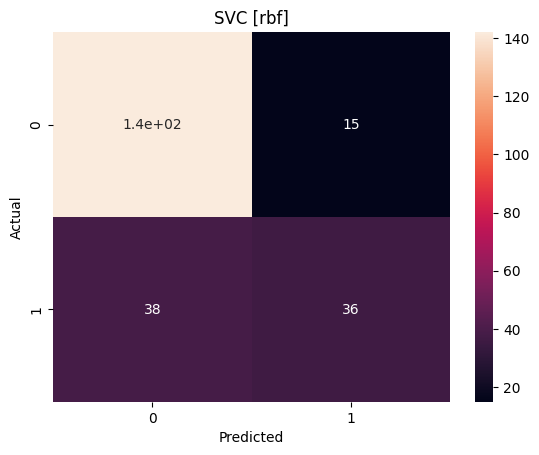

In [9]:
conf_mat=pd.crosstab(y_test, svc_prediction, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(conf_mat, annot=True).set(title='SVC [rbf]')

#Fitting the Model (SVM) using 'Linear' kernel

In [10]:
model= SVC(kernel='linear',random_state=0)
model.fit(x_train, y_train)
svc_prediction=model.predict(x_test)
print('svc_prediction: ', svc_prediction)

svc_prediction:  [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0
 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0
 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 1 1 0 0 0 0 0]


#Evaluation Metrics for 'Linear' kernel

In [11]:
conf_mat=metrics.confusion_matrix(y_test, svc_prediction)
print('SVC [ kernerl - linear ]')
print('Confusion Matrix : \n', conf_mat)
Accuracy_score=metrics.accuracy_score(y_test, svc_prediction) 
print('Accuracy Score : ', Accuracy_score)
print('Accuracy in Percentage : ', int(Accuracy_score*100),'%')
print(classification_report(svc_prediction,y_test))

SVC [ kernerl - linear ]
Confusion Matrix : 
 [[141  16]
 [ 34  40]]
Accuracy Score :  0.7835497835497836
Accuracy in Percentage :  78 %
              precision    recall  f1-score   support

           0       0.90      0.81      0.85       175
           1       0.54      0.71      0.62        56

    accuracy                           0.78       231
   macro avg       0.72      0.76      0.73       231
weighted avg       0.81      0.78      0.79       231



[Text(0.5, 1.0, 'SVC [linear]')]

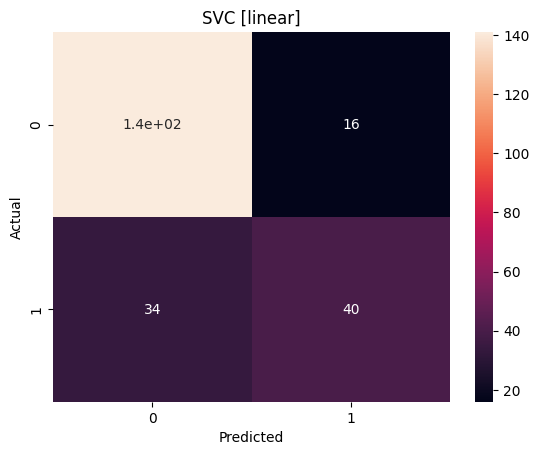

In [12]:
conf_mat=pd.crosstab(y_test, svc_prediction, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(conf_mat, annot=True).set(title='SVC [linear]')